<a href="https://colab.research.google.com/github/napoleaoonaya/data_science_python/blob/main/PraticaPerceptionAdaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import gdown

In [5]:
!gdown 19OhEU-5H-0bEPA-XE04uzmORLEeOoTOh

Downloading...
From: https://drive.google.com/uc?id=19OhEU-5H-0bEPA-XE04uzmORLEeOoTOh
To: /content/Titanic.csv
100% 61.2k/61.2k [00:00<00:00, 73.9MB/s]


In [12]:
import pandas as pd
import sys
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'


In [13]:
df = pd.read_csv('sample_data/Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

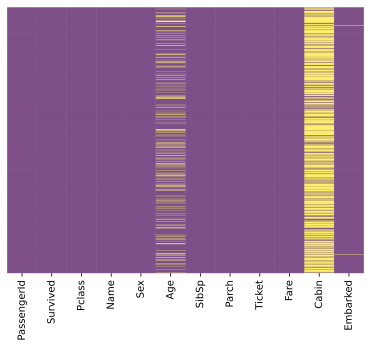

In [14]:
sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')

<ipython-input-16-1e395062fc84>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',


<Axes: xlabel='Pclass', ylabel='Age'>

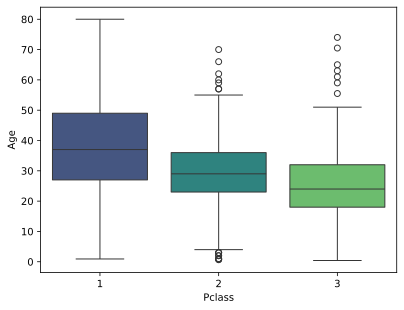

In [16]:
sns.boxplot(x='Pclass',
            y='Age',
            data=df,
            palette='viridis')

Podemos ver que os passageiros mais velhos mais ricos, nas classes mais altas, tedem a ser os mais velhos, Usaremos isso para inputar a media de Pclass por Age.

In [19]:
len(df.loc[df['Pclass']==1])

216

In [20]:
len(df.loc[df['Pclass']==2])

184

In [21]:
len(df.loc[df['Pclass']==3])

491

In [22]:
high_class = df.loc[df['Pclass']==1]

In [23]:
high_class['Age'].describe()

count    186.000000
mean      38.233441
std       14.802856
min        0.920000
25%       27.000000
50%       37.000000
75%       49.000000
max       80.000000
Name: Age, dtype: float64

In [24]:
pclass_age_map = {
  1: 38,
  2: 30,
  3: 25,
}
def replace_age_na(f_df, fill_map):
    cond=f_df['Age'].isna()
    res=f_df.loc[cond,'Pclass'].map(fill_map)
    f_df.loc[cond,'Age']=res
    return f_df


In [25]:
res = (
    df
    .pipe(replace_age_na, pclass_age_map)
 )
res.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

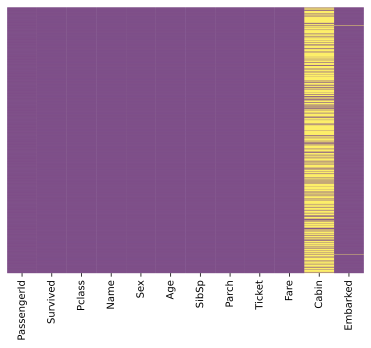

In [26]:
sns.heatmap( res.isnull() ,
            yticklabels=False,
            cbar=False,
            cmap='viridis')